In [ ]:
!git lfs install
!git lfs clone https://github.com/yandex/geo-reviews-dataset-2023.git

In [ ]:
import csv
import numpy as np

file_path = 'geo-reviews-dataset-2023/geo-reviews-dataset-2023.tskv'

hash_list = {'address': 0, 'name_ru': 1, 'rating': 2, 'rubrics': 3, 'text': 4}
data  = [['address', 'name_ru', 'rating', 'rubrics', 'text']]
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split('\t')
        newLine = [None]* 5
        for part in parts:
            column_name = part.split('=')[0]
            column_position = hash_list[column_name]
            column_value = (part[len(column_name)+1:]).replace('\\n', ' ')
            newLine[column_position] = column_value
        data.append(newLine)
csv_file_path = 'geo-reviews-dataset-2023.csv'
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(data)

In [3]:
import pandas as pd

df = pd.read_csv('geo-reviews-dataset-2023.csv', encoding='utf-8')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import csv
import numpy as np

df_copy = df[df['rating'] > 0]

df_copy['target'] = np.where((df_copy['rating'] == 4) | (df_copy['rating'] == 5), 1, 0)

texts = df_copy['text'] 
labels = df_copy['target'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=1)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

predictions = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, predictions))


C:\Users\fluke\AppData\Local\Temp\ipykernel_21308\3742956092.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['target'] = np.where((df_copy['rating'] == 4) | (df_copy['rating'] == 5), 1, 0)


Accuracy: 0.9363845538215286
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     13600
           1       0.97      0.95      0.96     86360

    accuracy                           0.94     99960
   macro avg       0.86      0.89      0.87     99960
weighted avg       0.94      0.94      0.94     99960



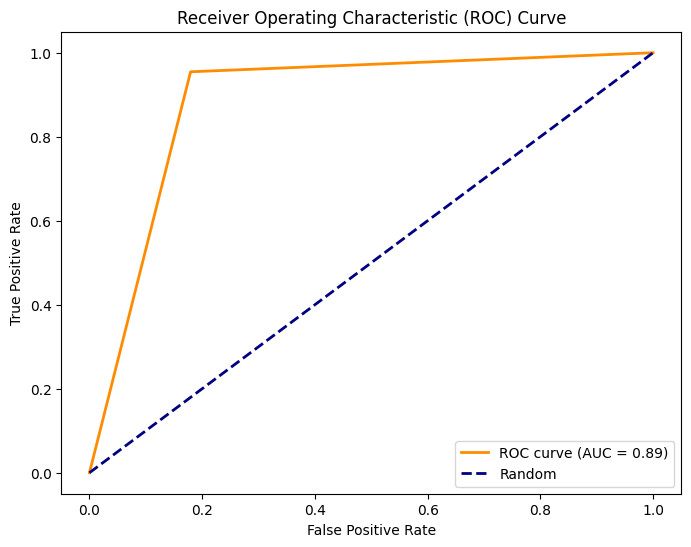

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[11160,  2440],
       [ 3919, 82441]], dtype=int64)